In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("carclaims.csv")

In [3]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 20000 non-null  object
 1   WeekOfMonth           20000 non-null  int64 
 2   DayOfWeek             20000 non-null  object
 3   Make                  20000 non-null  object
 4   AccidentArea          20000 non-null  object
 5   DayOfWeekClaimed      20000 non-null  object
 6   MonthClaimed          20000 non-null  object
 7   WeekOfMonthClaimed    20000 non-null  int64 
 8   Sex                   20000 non-null  object
 9   MaritalStatus         20000 non-null  object
 10  Age                   20000 non-null  int64 
 11  Fault                 20000 non-null  object
 12  PolicyType            20000 non-null  object
 13  VehicleCategory       20000 non-null  object
 14  VehiclePrice          20000 non-null  object
 15  PolicyNumber          20000 non-null

In [5]:
print("Number of Features Available:",df.shape[1])
print("Number of Records Available :",df.shape[0])

Number of Features Available: 33
Number of Records Available : 20000


In [6]:
print("Any missing data?:")
print(df.isnull().sum())

Any missing data?:
Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


# Exploratory Data Analysis

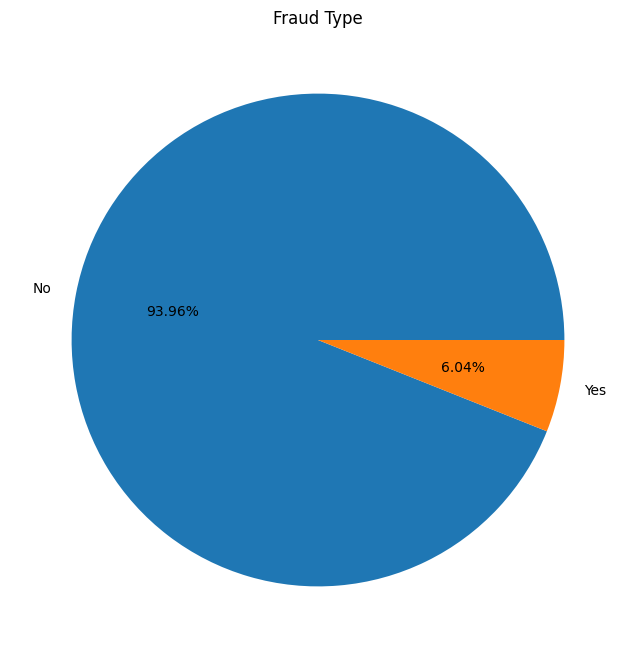

In [7]:
#create pie chart
plt.figure(figsize=(10,8))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.2f%%')
plt.title("Fraud Type")
plt.show()

### Merely 6.04% of claims are identified as Fraud, indicating a significant class imbalance within the dataset, considering this as the target feature.

In [8]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

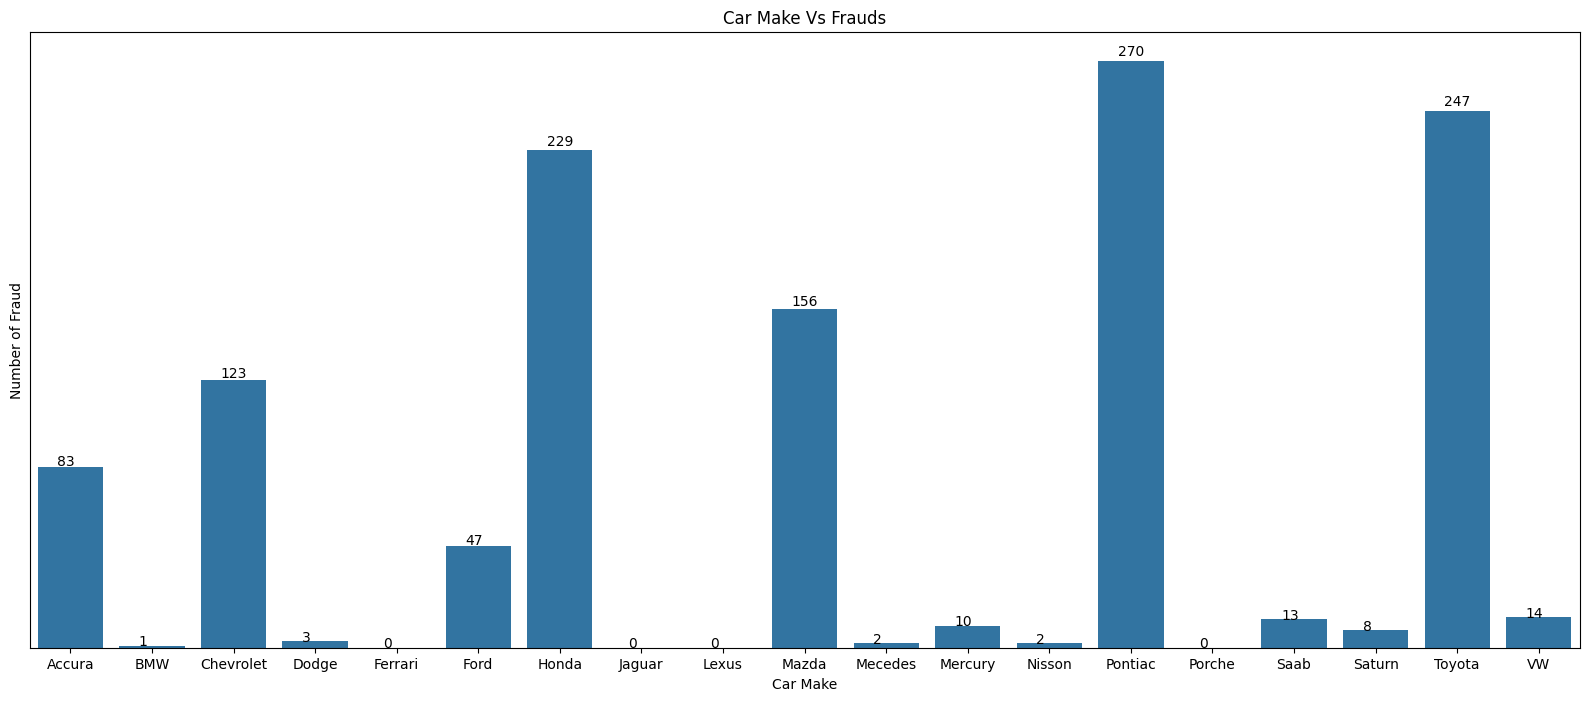

In [9]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index,y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### The majority of fraudulent cases are discovered in Pontiac, with none detected in Jaguar, Lexus, Porsche, and Ferrari.

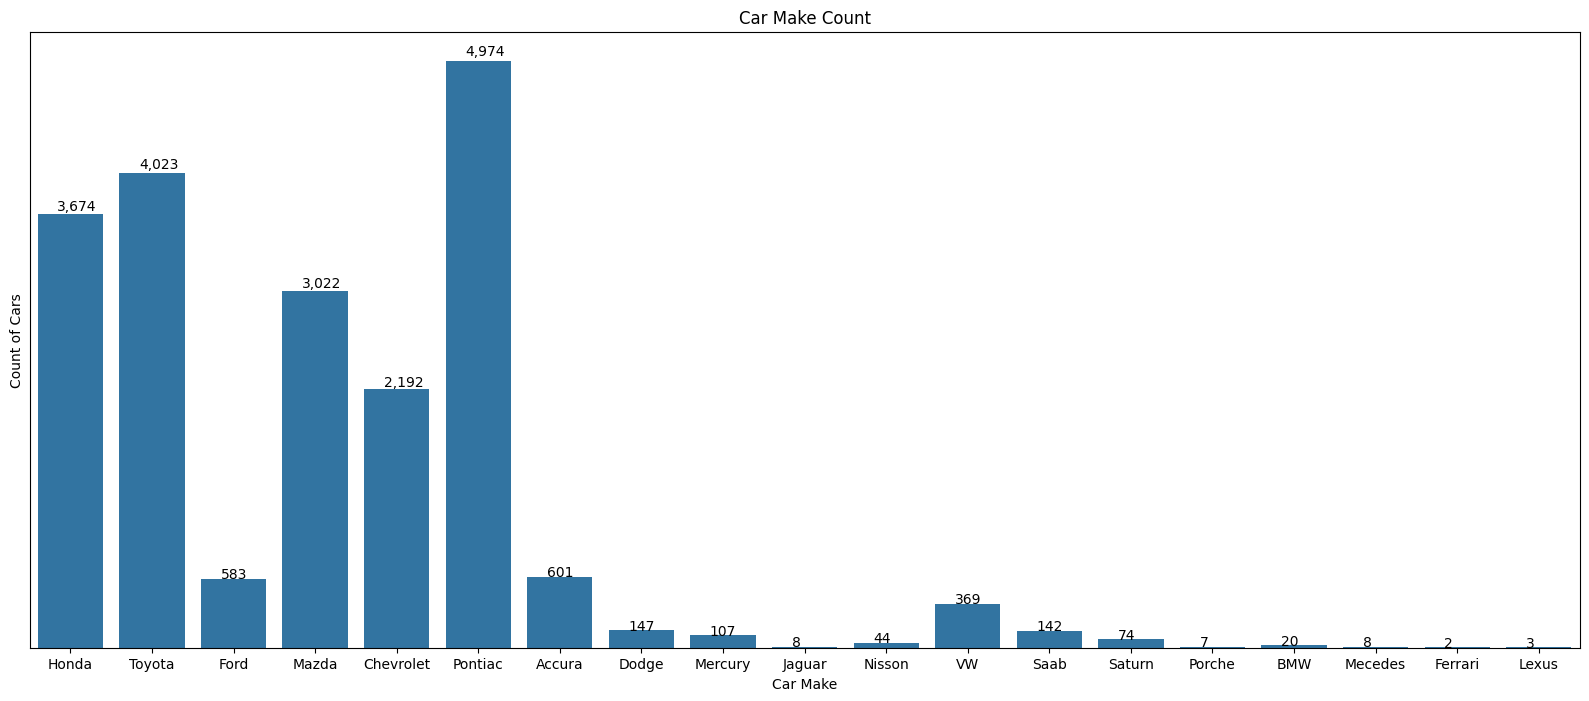

In [10]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")

ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Count of Cars");
plt.yticks([])
plt.show()

### The discrepancy in fraud claims between Pontiac and Jaguar, Lexus, Porsche, and Ferrari can be attributed to the differing numbers of cars involved in accidents. Pontiac likely has a higher frequency of accidents involving its cars, leading to more opportunities for fraudulent claims compared to the other brands mentioned.

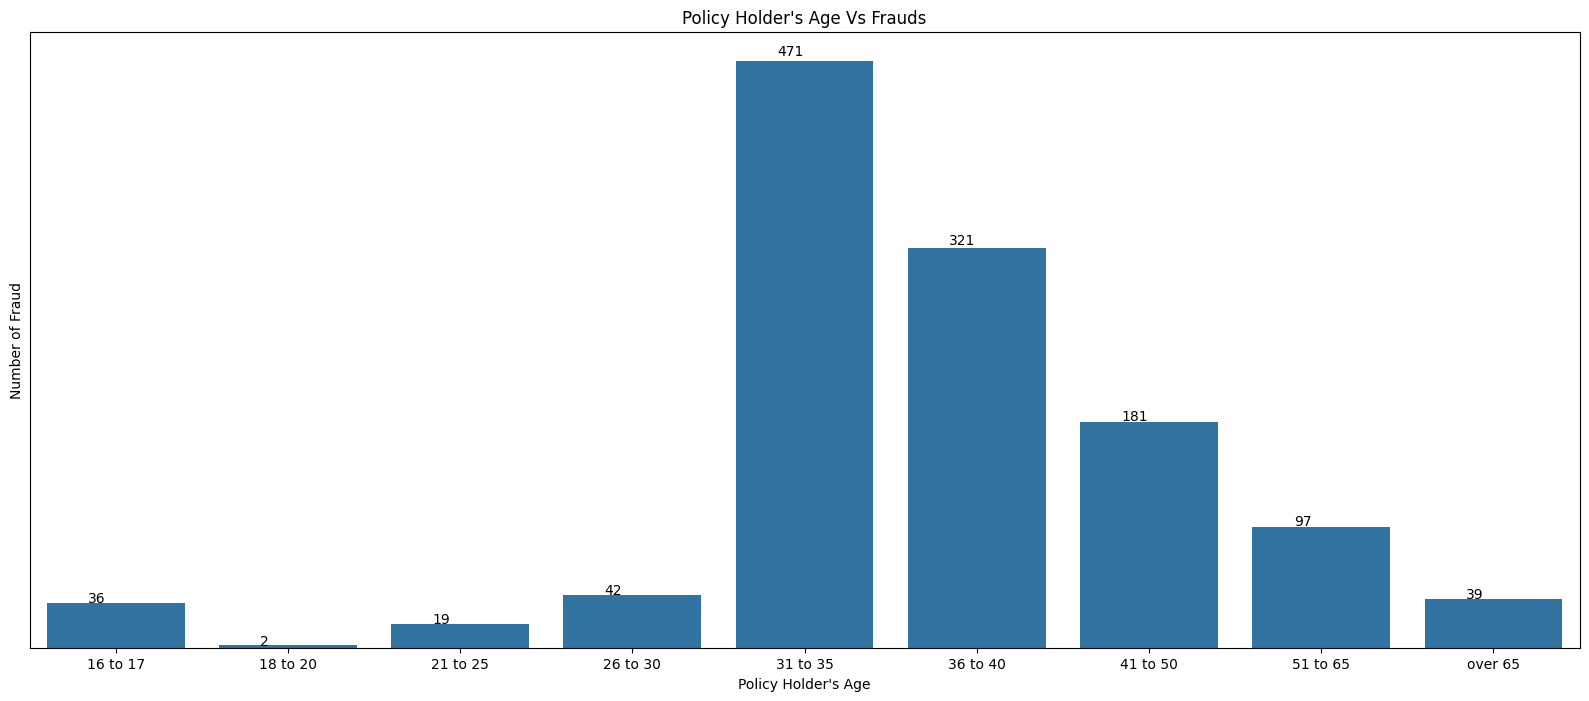

In [11]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### The age group of 31-35 exhibits the highest incidence of fraud, whereas the age group of 18-20 shows the lowest occurrence.

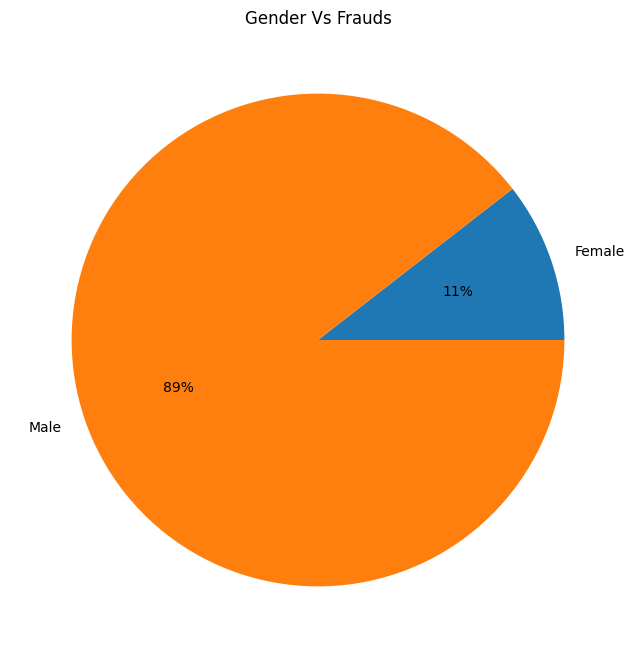

In [12]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

### Men exhibit a higher incidence of fraud compared to women.

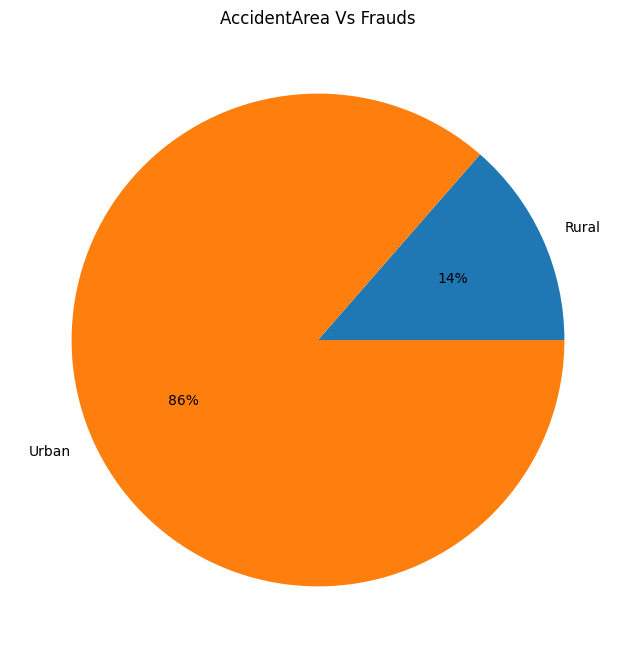

In [13]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

### There are more instances of fraud in urban areas compared to rural ones.

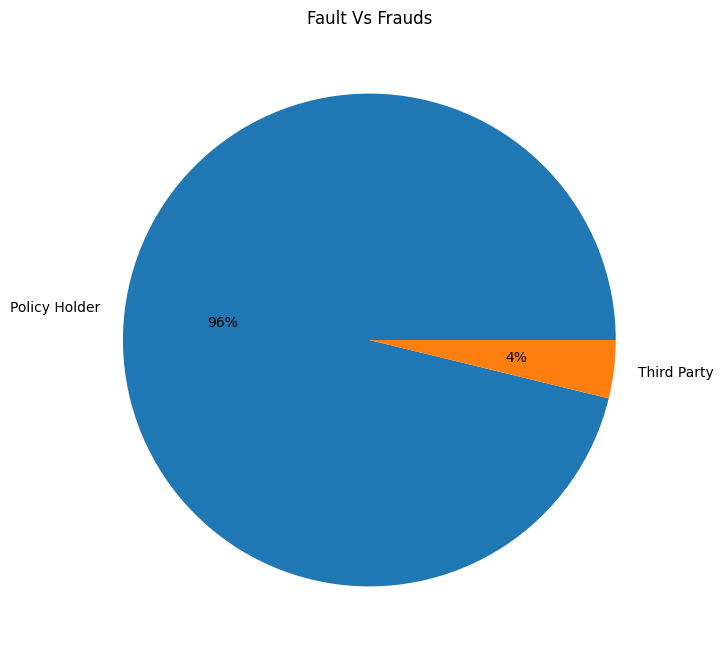

In [14]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

### It is evident that policyholders are responsible for a higher number of fraud cases.

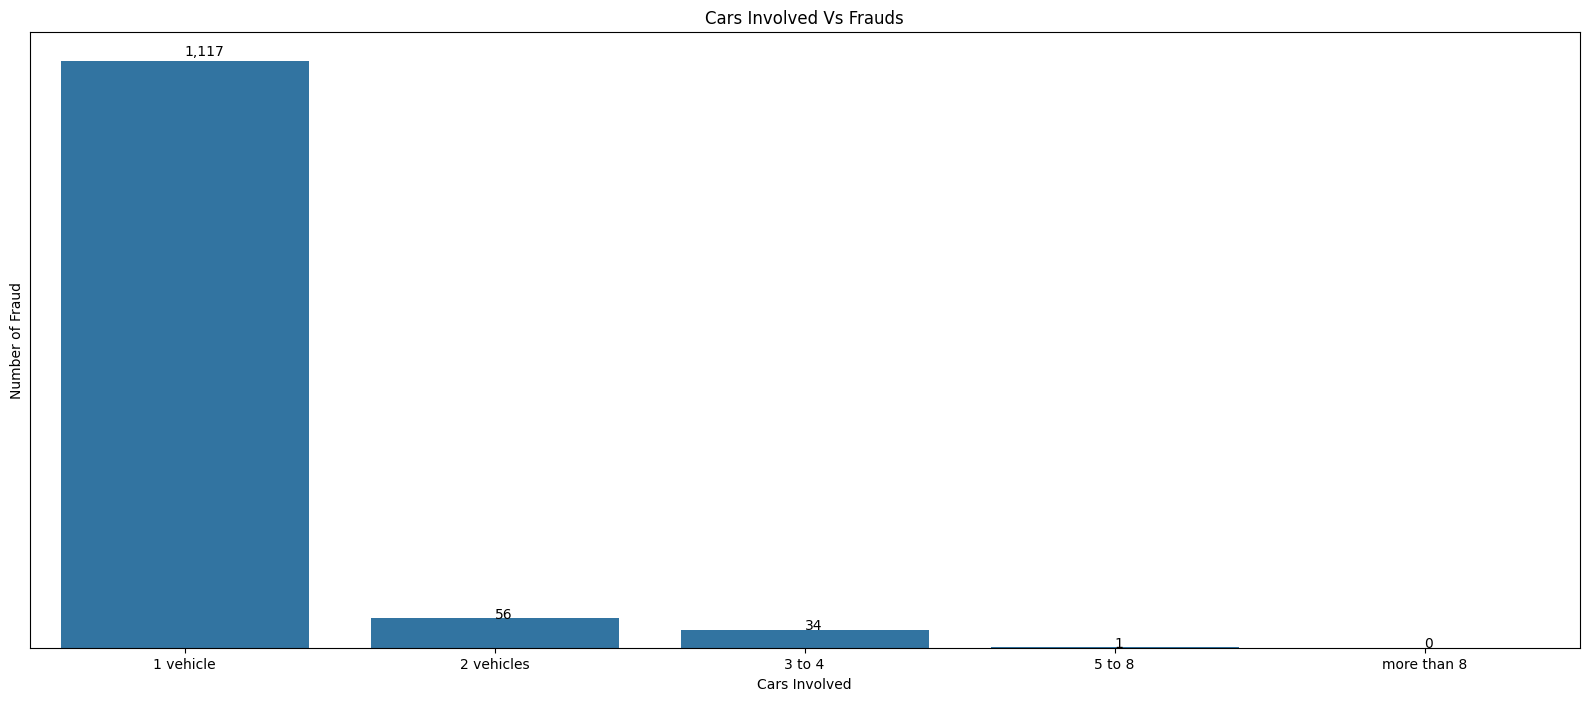

In [15]:

cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### Frauds tend to occur more frequently when only a single vehicle is involved in the incident.

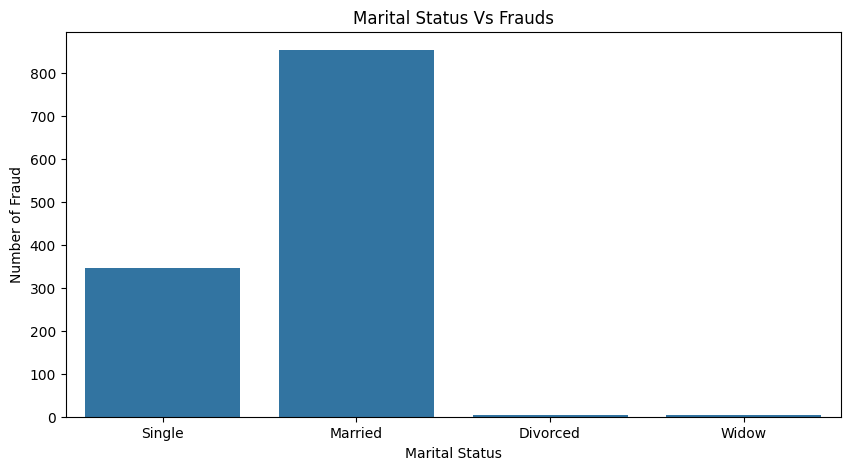

In [16]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(10,5))
plt.title("Marital Status Vs Frauds")
sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

### Married individuals are involved in a higher number of fraud cases.

In [17]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

In [18]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,2,5,6,6,1,6,5,1,0,2,...,3,0,0,0,3,0,2,0,2,0
1,4,3,6,6,1,2,5,4,1,2,...,4,1,0,0,3,3,0,0,1,0
2,10,5,0,6,1,5,10,2,1,1,...,6,0,0,0,3,3,0,0,1,0
3,6,2,2,17,0,1,6,1,1,1,...,7,1,0,0,2,3,0,0,2,0
4,4,5,1,6,1,6,4,2,0,2,...,4,0,0,0,3,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,10,2,4,13,1,1,11,2,1,2,...,8,0,0,0,2,3,0,1,2,0
19996,0,4,1,13,1,5,9,1,1,1,...,6,0,0,0,3,3,0,2,0,0
19997,11,2,5,13,1,6,12,2,1,1,...,6,0,0,0,0,3,0,0,0,0
19998,7,4,4,17,1,5,8,4,0,1,...,4,0,0,0,3,3,0,0,2,0


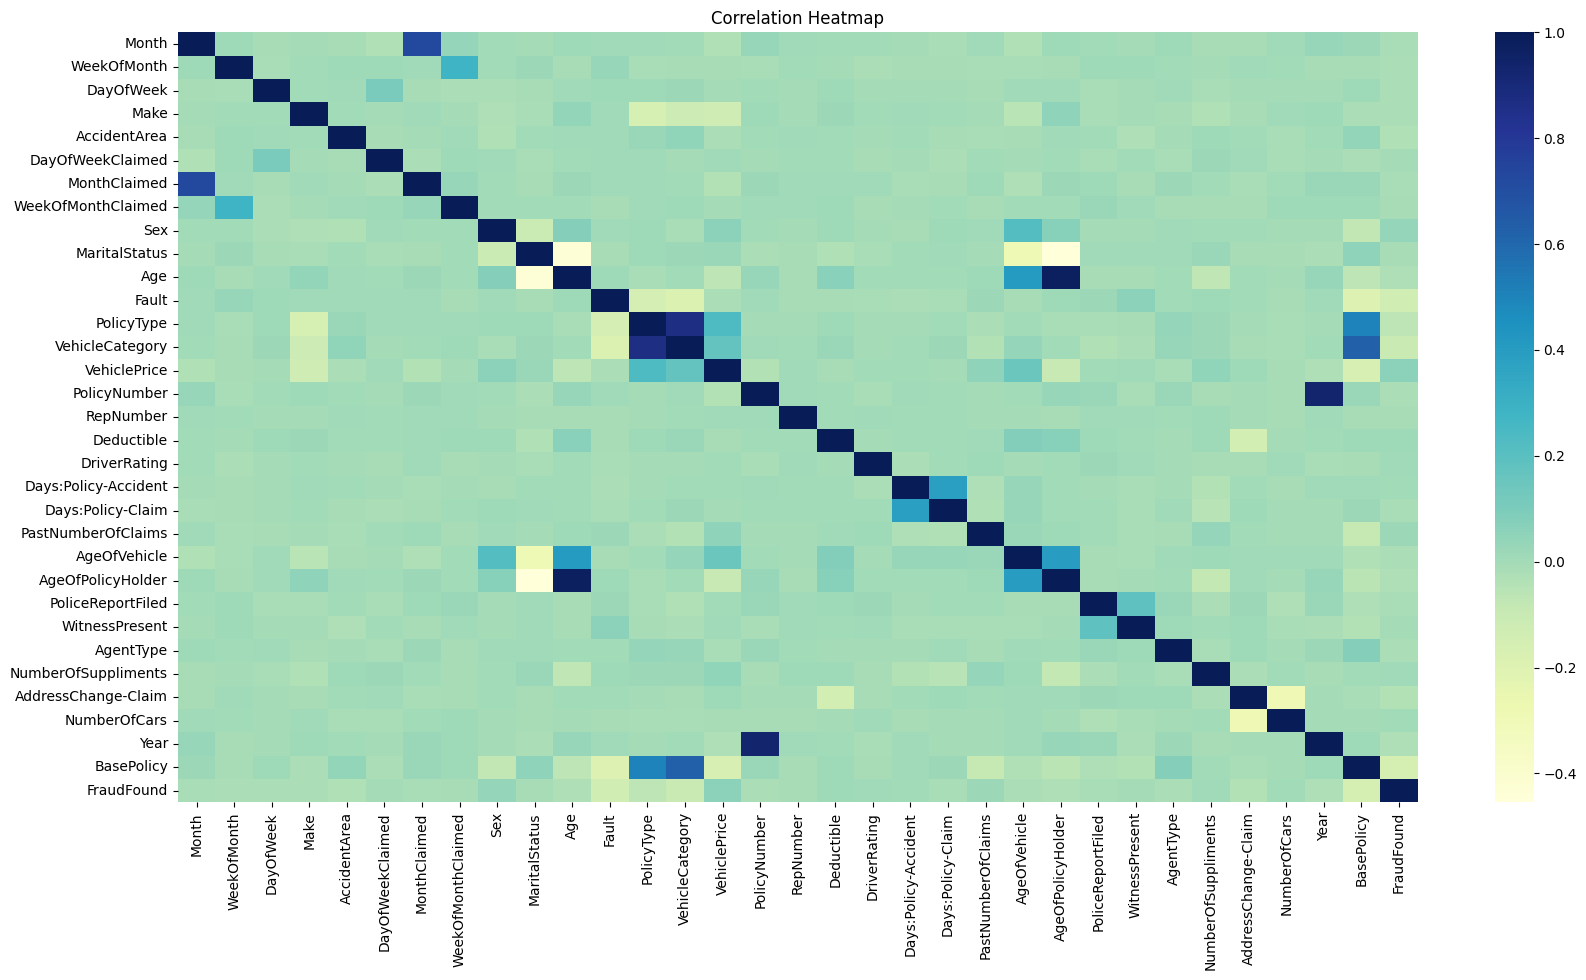

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### It appears there are strong correlations between certain features, suggesting they can be disregarded or removed from the analysis.

In [20]:
df_new = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

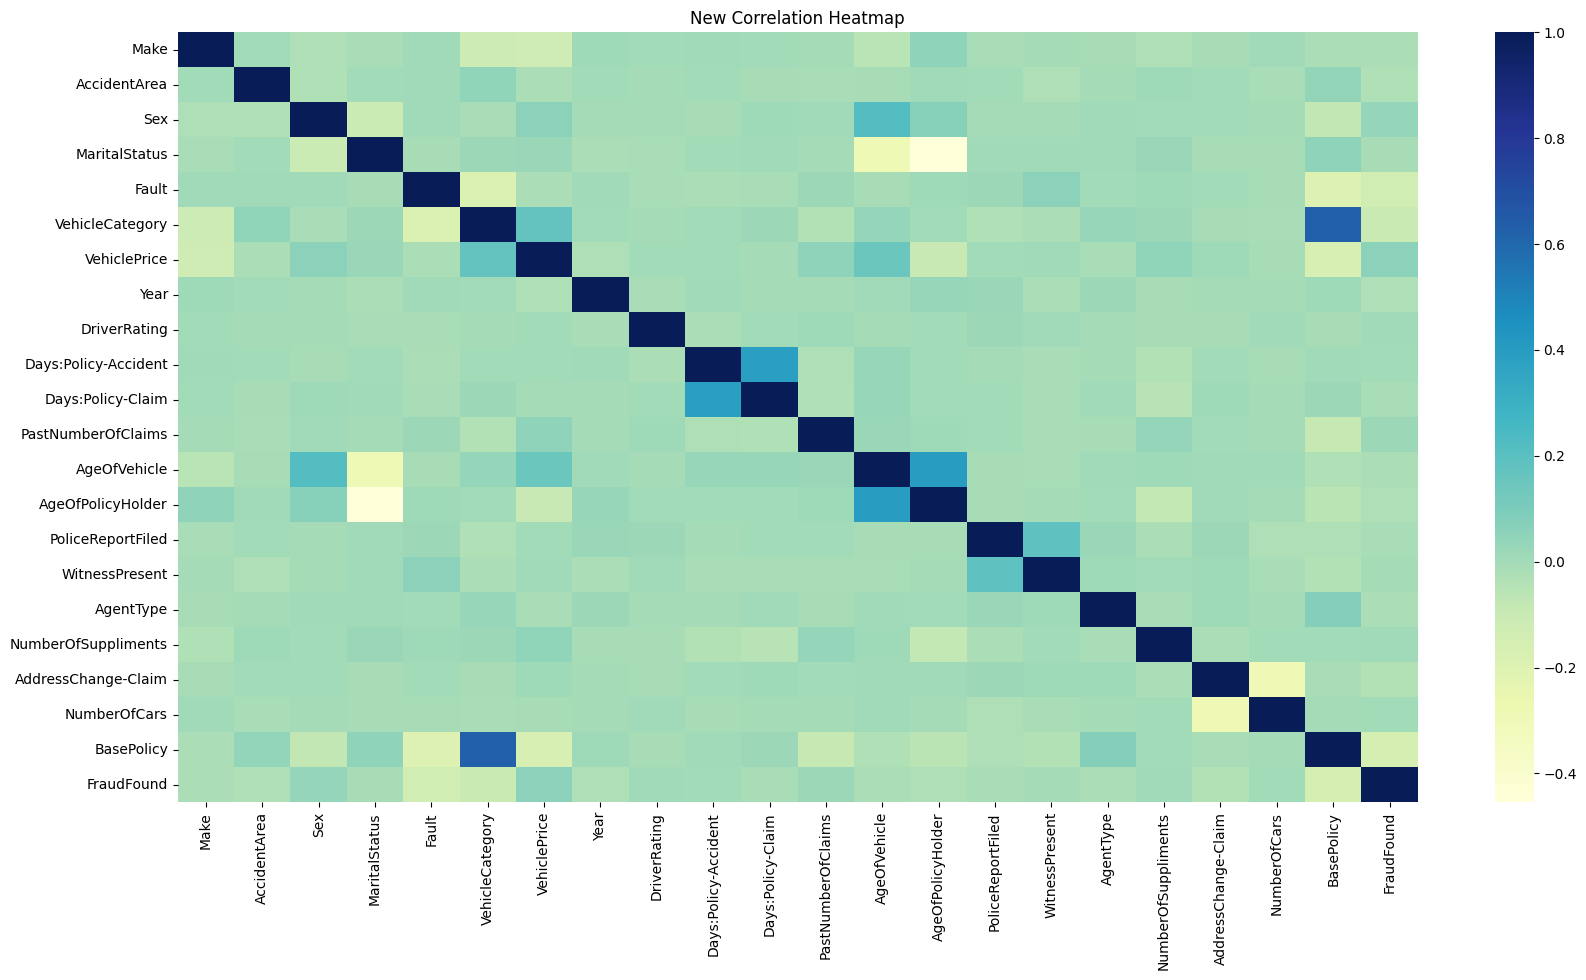

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

### Some correlation between BasePolicy and VehicleCategory still exists, but for now, we'll leave it untouched.

In [22]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))

    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

# Data Modeling

In [23]:
X = df_new.drop('FraudFound',axis=1)
y = df_new[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 21), (5000, 21), (15000, 1), (5000, 1))

# Logistic Regression

Accuracy:		 0.9394
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4698
           1       0.00      0.00      0.00       302

    accuracy                           0.94      5000
   macro avg       0.47      0.50      0.48      5000
weighted avg       0.88      0.94      0.91      5000

AUC ROC: 0.4998935717326522


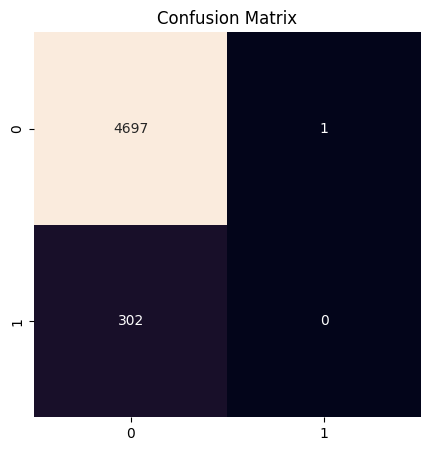

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Accuracy:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_pred))

# Get the AUC ROC
auc_roc_lr = roc_auc_score(y_test, lr_pred)
print("AUC ROC:", auc_roc_lr)

# RandomForest Classifier

Accuracy:		 0.9566
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4698
           1       0.84      0.35      0.49       302

    accuracy                           0.96      5000
   macro avg       0.90      0.67      0.73      5000
weighted avg       0.95      0.96      0.95      5000

AUC ROC: 0.4998935717326522


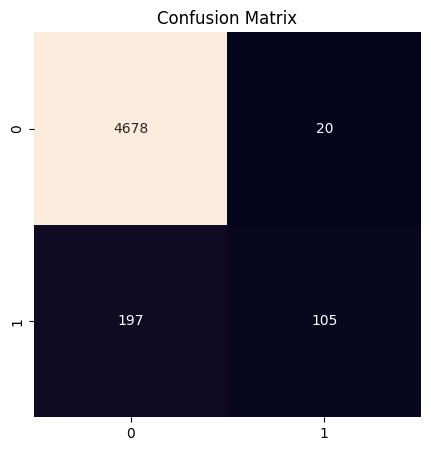

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, rfc_pred))

# Get the AUC ROC
auc_roc_rf = roc_auc_score(y_test, lr_pred)
print("AUC ROC:", auc_roc_rf)

# Support Vector Machine (SVM)

Accuracy: 0.9396
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4698
           1       0.00      0.00      0.00       302

    accuracy                           0.94      5000
   macro avg       0.47      0.50      0.48      5000
weighted avg       0.88      0.94      0.91      5000

AUC ROC: 0.4998935717326522


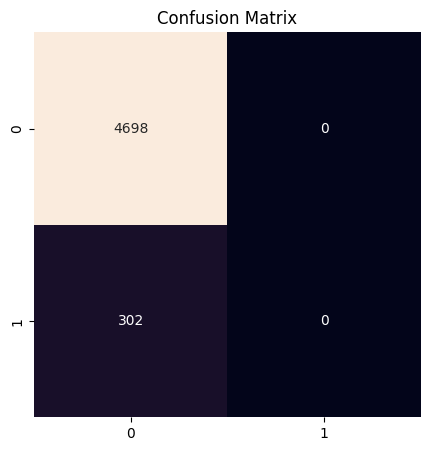

In [26]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

acc_svm = accuracy_score(y_test, svm_pred)
print("Accuracy:", acc_svm)
conf_matrix(y_test, svm_pred)

print("Classification Report for Support Vector Machine:")
print(classification_report(y_test, svm_pred))

# Get the AUC ROC
auc_roc_svm = roc_auc_score(y_test, lr_pred)
print("AUC ROC:", auc_roc_svm)

# K-Nearest Neighbors (KNN)

Accuracy: 0.9342
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4698
           1       0.34      0.09      0.15       302

    accuracy                           0.93      5000
   macro avg       0.64      0.54      0.56      5000
weighted avg       0.91      0.93      0.92      5000

AUC ROC: 0.4998935717326522


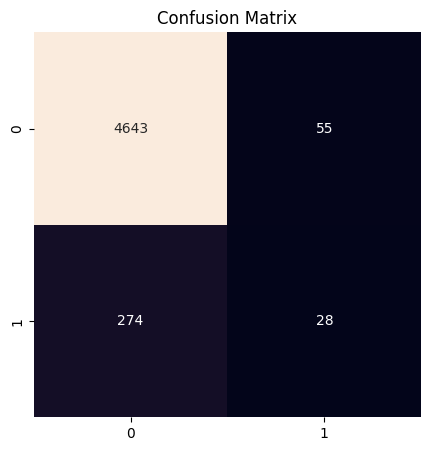

In [27]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_test, knn_pred)
print("Accuracy:", acc_knn)
conf_matrix(y_test, knn_pred)

print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, knn_pred))

# Get the AUC ROC
auc_roc_knn = roc_auc_score(y_test, lr_pred)
print("AUC ROC:", auc_roc_knn)

# Decision Tree Classifier

Accuracy: 0.9214
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4698
           1       0.38      0.47      0.42       302

    accuracy                           0.92      5000
   macro avg       0.67      0.71      0.69      5000
weighted avg       0.93      0.92      0.93      5000

AUC ROC: 0.4998935717326522


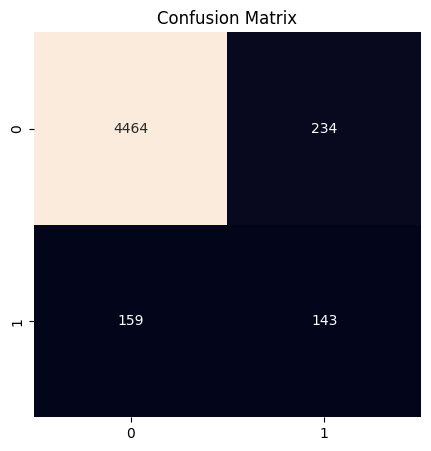

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test, dt_pred)
print("Accuracy:", acc_dt)
conf_matrix(y_test, dt_pred)

print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, dt_pred))

# Get the AUC ROC
auc_roc_dt = roc_auc_score(y_test, lr_pred)
print("AUC ROC:", auc_roc_dt)

# XGBoost Classifier

Accuracy: 0.9436
Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4698
           1       0.67      0.13      0.22       302

    accuracy                           0.94      5000
   macro avg       0.81      0.56      0.59      5000
weighted avg       0.93      0.94      0.93      5000

AUC ROC: 0.4998935717326522


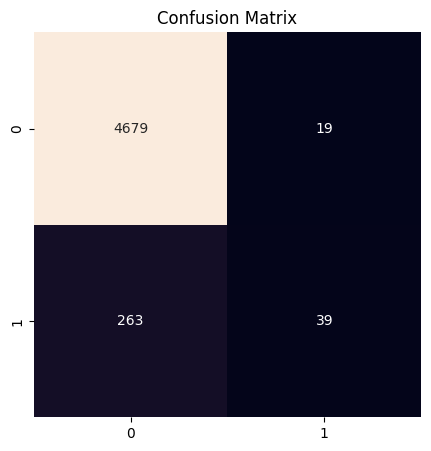

In [29]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, xgb_pred)
print("Accuracy:", acc_xgb)
conf_matrix(y_test, xgb_pred)

print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, xgb_pred))

# Get the AUC ROC
auc_roc_xgb = roc_auc_score(y_test, lr_pred)
print("AUC ROC:", auc_roc_xgb)

# The dataset is extremely imbalanced and will not give accurate information. This can be overcome by one of the two ways :
  Downsample the Majority Class (FraudFound ==0) in this case
  
  Upscale the Minority Class    (FraudFound ==1) in this case

# 1. DownSample Majority Class

In [30]:
n = df_new.FraudFound.value_counts()[1]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_majority_downsampled = resample(df_majority,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_minority,df_majority_downsampled])
df_downsampled.FraudFound.value_counts()

FraudFound
1    1208
0    1208
Name: count, dtype: int64

In [31]:
X = df_downsampled.drop('FraudFound',axis=1)
y = df_downsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1812, 21), (604, 21), (1812, 1), (604, 1))

# Logistic Regression - DownSample

Accuracy:	 0.7334437086092715
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       302
           1       0.70      0.82      0.75       302

    accuracy                           0.73       604
   macro avg       0.74      0.73      0.73       604
weighted avg       0.74      0.73      0.73       604

AUC ROC: 0.7334437086092715


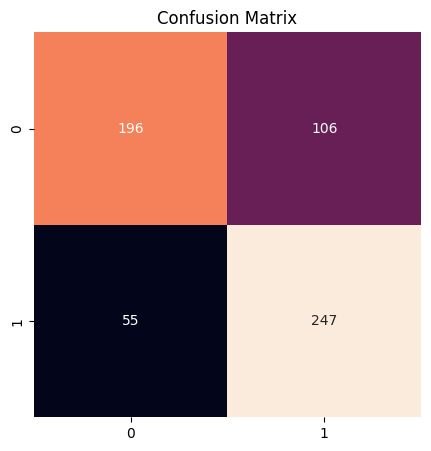

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_downscale_pred = lr.predict(X_test)

acc_lr_downscale = accuracy_score(y_test, lr_downscale_pred)
print("Accuracy:\t", acc_lr_downscale)
conf_matrix(y_test, lr_downscale_pred)
print("Classification Report:")
print(classification_report(y_test, lr_downscale_pred))

# Get the AUC ROC
auc_roc_lrd = roc_auc_score(y_test, lr_downscale_pred)
print("AUC ROC:", auc_roc_lrd)

# RandomForest Classifier - DownSample

Accuracy:	 0.7963576158940397
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       302
           1       0.75      0.88      0.81       302

    accuracy                           0.80       604
   macro avg       0.80      0.80      0.80       604
weighted avg       0.80      0.80      0.80       604

AUC ROC: 0.7963576158940397


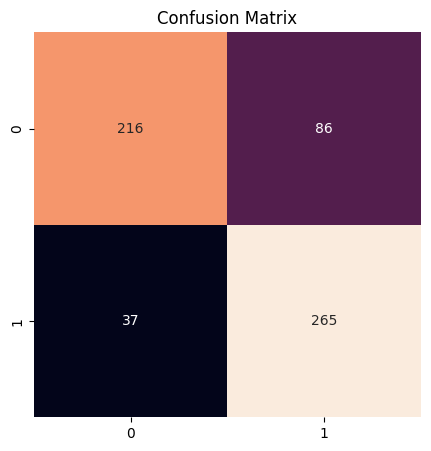

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_downscale_pred = rfc.predict(X_test)

acc_rfc_downscale = accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy:\t", acc_rfc_downscale)
conf_matrix(y_test, rfc_downscale_pred)
print("Classification Report:")
print(classification_report(y_test, rfc_downscale_pred))

# Get the AUC ROC
auc_roc_rfd = roc_auc_score(y_test, rfc_downscale_pred)
print("AUC ROC:", auc_roc_rfd)

# Support Vector Machine (SVM) - DownSample

Accuracy:	 0.7582781456953642
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71       302
           1       0.69      0.92      0.79       302

    accuracy                           0.76       604
   macro avg       0.79      0.76      0.75       604
weighted avg       0.79      0.76      0.75       604

AUC ROC: 0.7582781456953642


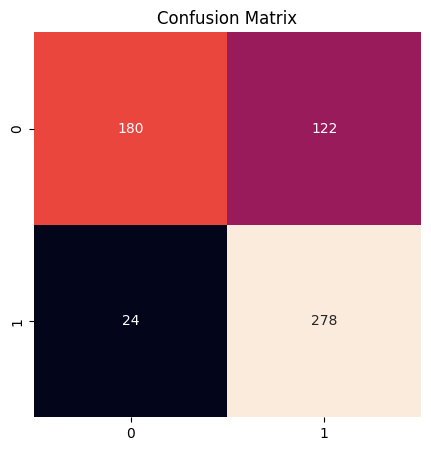

In [34]:
svm = SVC()
svm.fit(X_train, y_train)
svm_downscale_pred = svm.predict(X_test)

acc_svm_downscale = accuracy_score(y_test, svm_downscale_pred)
print("Accuracy:\t", acc_svm_downscale)
conf_matrix(y_test, svm_downscale_pred)
print("Classification Report:")
print(classification_report(y_test, svm_downscale_pred))

# Get the AUC ROC
auc_roc_svmd = roc_auc_score(y_test, svm_downscale_pred)
print("AUC ROC:", auc_roc_svmd)

# K-Nearest Neighbors (KNN) - DownSample

Accuracy:	 0.6357615894039735
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62       302
           1       0.62      0.68      0.65       302

    accuracy                           0.64       604
   macro avg       0.64      0.64      0.63       604
weighted avg       0.64      0.64      0.63       604

AUC ROC: 0.6357615894039736


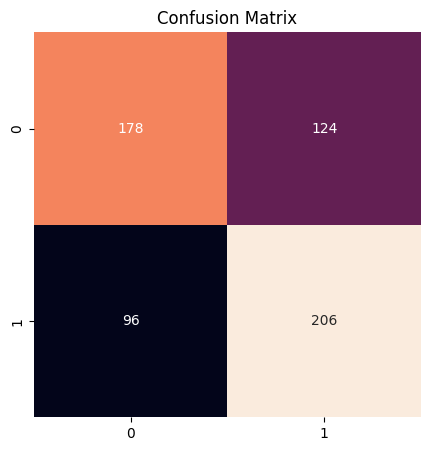

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_downscale_pred = knn.predict(X_test)

acc_knn_downscale = accuracy_score(y_test, knn_downscale_pred)
print("Accuracy:\t", acc_knn_downscale)
conf_matrix(y_test, knn_downscale_pred)
print("Classification Report:")
print(classification_report(y_test, knn_downscale_pred))

# Get the AUC ROC
auc_roc_knnd = roc_auc_score(y_test, knn_downscale_pred)
print("AUC ROC:", auc_roc_knnd)

# Decision Tree Classifier - DownSample

Accuracy:	 0.7367549668874173
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       302
           1       0.74      0.74      0.74       302

    accuracy                           0.74       604
   macro avg       0.74      0.74      0.74       604
weighted avg       0.74      0.74      0.74       604

AUC ROC: 0.7367549668874173


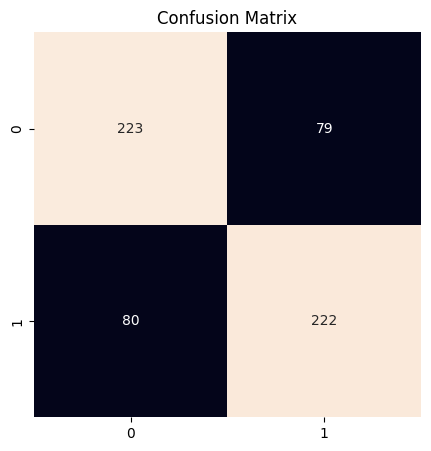

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_downscale_pred = dt.predict(X_test)

acc_dt_downscale = accuracy_score(y_test, dt_downscale_pred)
print("Accuracy:\t", acc_dt_downscale)
conf_matrix(y_test, dt_downscale_pred)
print("Classification Report:")
print(classification_report(y_test, dt_downscale_pred))

# Get the AUC ROC
auc_roc_dtd = roc_auc_score(y_test, dt_downscale_pred)
print("AUC ROC:", auc_roc_dtd)

# XGBoost Classifier - DownSample

Accuracy:	 0.7682119205298014
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       302
           1       0.75      0.81      0.78       302

    accuracy                           0.77       604
   macro avg       0.77      0.77      0.77       604
weighted avg       0.77      0.77      0.77       604

AUC ROC: 0.7682119205298015


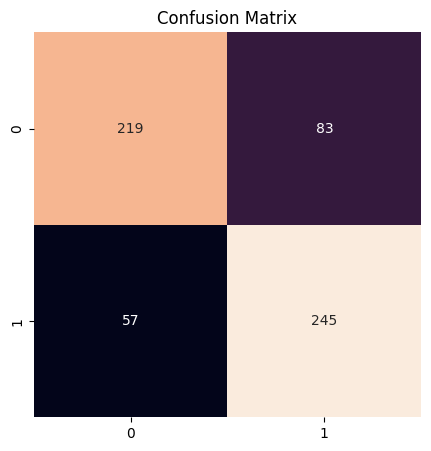

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_downscale_pred = xgb.predict(X_test)

acc_xgb_downscale = accuracy_score(y_test, xgb_downscale_pred)
print("Accuracy:\t", acc_xgb_downscale)
conf_matrix(y_test, xgb_downscale_pred)
print("Classification Report:")
print(classification_report(y_test, xgb_downscale_pred))

# Get the AUC ROC
auc_roc_xgbd = roc_auc_score(y_test, xgb_downscale_pred)
print("AUC ROC:", auc_roc_xgbd)

# 2. Upscale the Minority Class

In [38]:
n = df_new.FraudFound.value_counts()[0]

df_majority = df_new[df_new.FraudFound==0]
df_minority = df_new[df_new.FraudFound==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

FraudFound
0    18792
1    18792
Name: count, dtype: int64

In [39]:
X = df_upsampled.drop('FraudFound',axis=1)
y = df_upsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28188, 21), (9396, 21), (28188, 1), (9396, 1))

# Logistic Regression - Upscale

Accuracy:		 0.7430821626223925
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      4698
           1       0.70      0.85      0.77      4698

    accuracy                           0.74      9396
   macro avg       0.75      0.74      0.74      9396
weighted avg       0.75      0.74      0.74      9396

AUC ROC: 0.7430821626223925


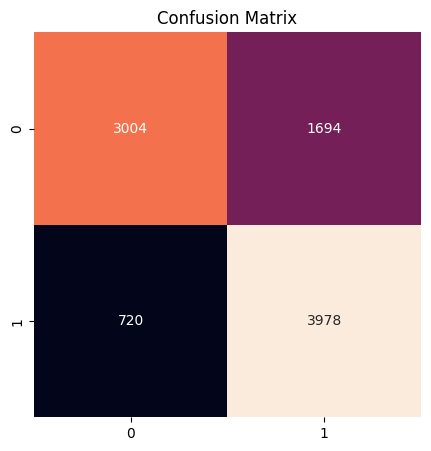

In [40]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_upscale_pred = lr.predict(X_test)

acc_lr_upscale=accuracy_score(y_test, lr_upscale_pred)
print("Accuracy:\t\t",acc_lr_upscale)
conf_matrix(y_test,lr_upscale_pred)
print("Classification Report:")
print(classification_report(y_test, lr_upscale_pred))

# Get the AUC ROC
auc_roc_lru = roc_auc_score(y_test, lr_upscale_pred)
print("AUC ROC:", auc_roc_lru)

# RandomForest Classifier - Upscale

Accuracy:		 0.9927628778203491
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4698
           1       0.99      1.00      0.99      4698

    accuracy                           0.99      9396
   macro avg       0.99      0.99      0.99      9396
weighted avg       0.99      0.99      0.99      9396

AUC ROC: 0.9927628778203491


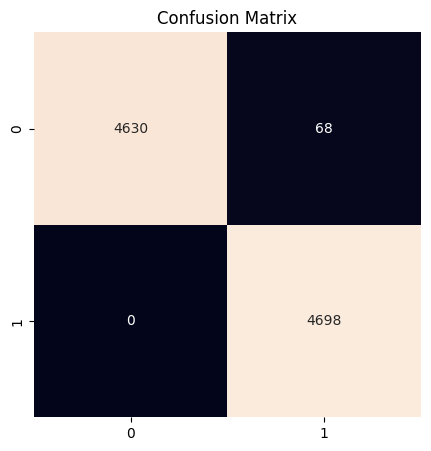

In [41]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy:\t\t",acc_rfc_upscale)
conf_matrix(y_test,rfc_upscale_pred)
print("Classification Report:")
print(classification_report(y_test, rfc_upscale_pred))

# Get the AUC ROC
auc_roc_rfu = roc_auc_score(y_test, rfc_upscale_pred)
print("AUC ROC:", auc_roc_rfu)

# Support Vector Machine - Upscale

Accuracy:	 0.7553214133673903
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      4698
           1       0.69      0.92      0.79      4698

    accuracy                           0.76      9396
   macro avg       0.79      0.76      0.75      9396
weighted avg       0.79      0.76      0.75      9396

AUC ROC: 0.7553214133673904


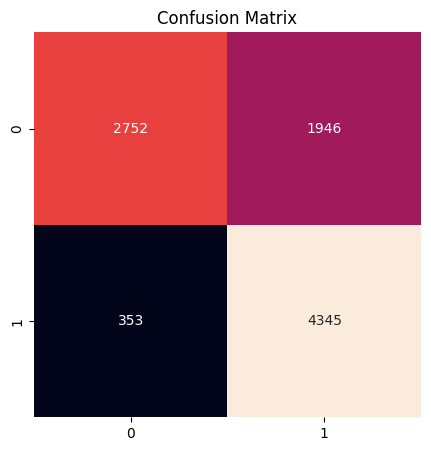

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
svm_upscale_pred = svm.predict(X_test)

acc_svm_upscale = accuracy_score(y_test, svm_upscale_pred)
print("Accuracy:\t", acc_svm_upscale)
conf_matrix(y_test,svm_upscale_pred)
print("Classification Report:")
print(classification_report(y_test, svm_upscale_pred))

# Get the AUC ROC
auc_roc_svmu = roc_auc_score(y_test, svm_upscale_pred)
print("AUC ROC:", auc_roc_svmu)

# K-Nearest Neighbors - Upscale

Accuracy:	 0.909855257556407
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      4698
           1       0.85      1.00      0.92      4698

    accuracy                           0.91      9396
   macro avg       0.92      0.91      0.91      9396
weighted avg       0.92      0.91      0.91      9396

AUC ROC: 0.909855257556407


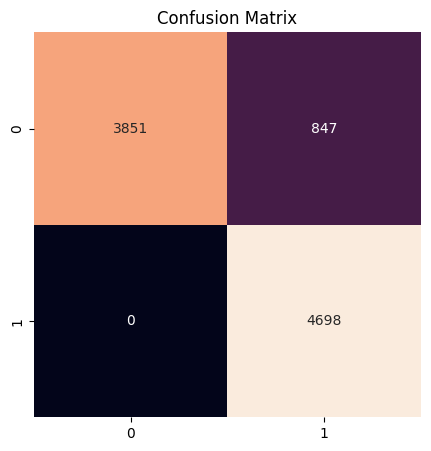

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_upscale_pred = knn.predict(X_test)

acc_knn_upscale = accuracy_score(y_test, knn_upscale_pred)
print("Accuracy:\t", acc_knn_upscale)
conf_matrix(y_test, knn_upscale_pred)
print("Classification Report:")
print(classification_report(y_test, knn_upscale_pred))

# Get the AUC ROC
auc_roc_knnu = roc_auc_score(y_test, knn_upscale_pred)
print("AUC ROC:", auc_roc_knnu)

# Decision Tree Classifier - Upscale

Accuracy:	 0.9762664963814389
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4698
           1       0.95      1.00      0.98      4698

    accuracy                           0.98      9396
   macro avg       0.98      0.98      0.98      9396
weighted avg       0.98      0.98      0.98      9396

AUC ROC: 0.9762664963814389


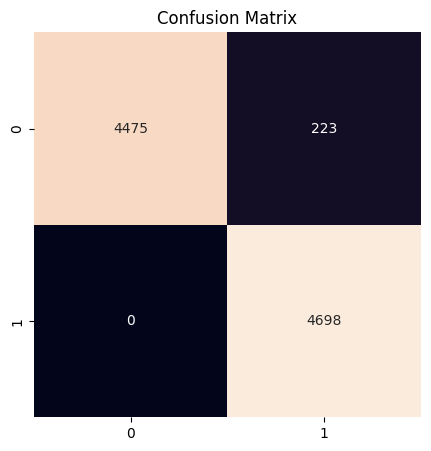

In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_upscale_pred = dt.predict(X_test)

acc_dt_upscale = accuracy_score(y_test, dt_upscale_pred)
print("Accuracy:\t", acc_dt_upscale)
conf_matrix(y_test, dt_upscale_pred)
print("Classification Report:")
print(classification_report(y_test, dt_upscale_pred))

# Get the AUC ROC
auc_roc_dtu = roc_auc_score(y_test, dt_upscale_pred)
print("AUC ROC:", auc_roc_dtu)

# XGBoost Classifier - Upscale

Accuracy:	 0.9111323967645807
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      4698
           1       0.86      0.99      0.92      4698

    accuracy                           0.91      9396
   macro avg       0.92      0.91      0.91      9396
weighted avg       0.92      0.91      0.91      9396

AUC ROC: 0.9111323967645808


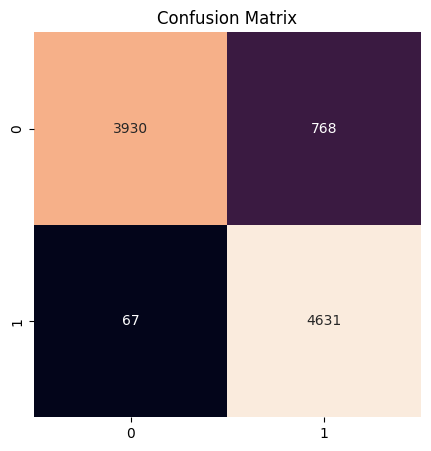

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_upscale_pred = xgb.predict(X_test)

acc_xgb_upscale = accuracy_score(y_test, xgb_upscale_pred)
print("Accuracy:\t", acc_xgb_upscale)
conf_matrix(y_test, xgb_upscale_pred)
print("Classification Report:")
print(classification_report(y_test, xgb_upscale_pred))

# Get the AUC ROC
auc_roc_xgbu = roc_auc_score(y_test, xgb_upscale_pred)
print("AUC ROC:", auc_roc_xgbu)

# Comparison of Various Models

In [46]:
from tabulate import tabulate

data = {
    'Model': ['Logistic Regression', 'UpScale Logistic Regression', 'DownScale Logistic Regression',
              'RandomForest Classifier', 'UpScale RandomForest Classifier', 'DownScale RandomForest Classifier',
              'Support Vector Machine', 'UpScale Support Vector Machine', 'DownScale Support Vector Machine',
              'K-Nearest Neighbors', 'UpScale K-Nearest Neighbors', 'DownScale K-Nearest Neighbors',
              'Decision Tree Classifier', 'UpScale Decision Tree Classifier', 'DownScale Decision Tree Classifier',
              'XGBoost Classifier', 'UpScale XGBoost Classifier', 'DownScale XGBoost Classifier'],

    'Accuracy Score': [acc_lr, acc_lr_upscale, acc_lr_downscale,
                       acc_rfc, acc_rfc_upscale, acc_rfc_downscale,
                       acc_svm, acc_svm_upscale, acc_svm_downscale,
                       acc_knn, acc_knn_upscale, acc_knn_downscale,
                       acc_dt, acc_dt_upscale, acc_dt_downscale,
                       acc_xgb, acc_xgb_upscale, acc_xgb_downscale],

    'AUC ROC': [auc_roc_lr, auc_roc_lru, auc_roc_lrd,
                auc_roc_rf, auc_roc_rfu, auc_roc_rfd,
                auc_roc_svm, auc_roc_svmu, auc_roc_svmd,
                auc_roc_knn, auc_roc_knnu, auc_roc_knnd,
                auc_roc_dt, auc_roc_dtu, auc_roc_dtd,
                auc_roc_xgb, auc_roc_xgbu, auc_roc_xgbd]
}

# Print the comparison table using tabulate
print(tabulate(data, headers='keys', tablefmt='pretty'))


+------------------------------------+--------------------+--------------------+
|               Model                |   Accuracy Score   |      AUC ROC       |
+------------------------------------+--------------------+--------------------+
|        Logistic Regression         |       0.9394       | 0.4998935717326522 |
|    UpScale Logistic Regression     | 0.7430821626223925 | 0.7430821626223925 |
|   DownScale Logistic Regression    | 0.7334437086092715 | 0.7334437086092715 |
|      RandomForest Classifier       |       0.9566       | 0.4998935717326522 |
|  UpScale RandomForest Classifier   | 0.9927628778203491 | 0.9927628778203491 |
| DownScale RandomForest Classifier  | 0.7963576158940397 | 0.7963576158940397 |
|       Support Vector Machine       |       0.9396       | 0.4998935717326522 |
|   UpScale Support Vector Machine   | 0.7553214133673903 | 0.7553214133673904 |
|  DownScale Support Vector Machine  | 0.7582781456953642 | 0.7582781456953642 |
|        K-Nearest Neighbors

# Random Forest Top 10 Most Important Features

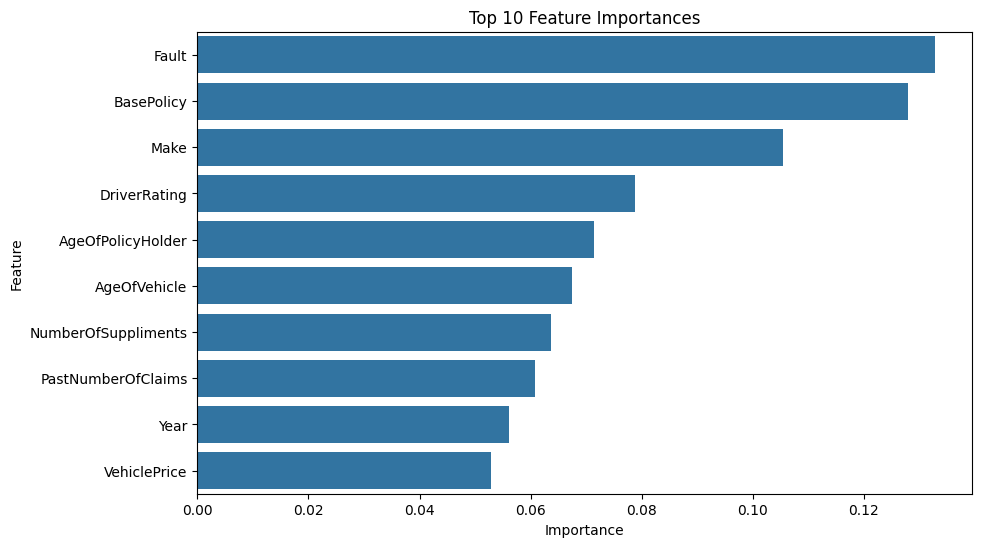

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rfc.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Random Forest Best Hyperparameters

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.9923371546243107


# Anomaly Detection

Anomaly detection can be a useful step in your project to identify outliers that might represent fraudulent claims. Here, we'll use Isolation Forest and Local Outlier Factor (LOF) for anomaly detection.

# Isolation Forest

Isolation Forest is an algorithm particularly well-suited for anomaly detection because it explicitly isolates anomalies instead of profiling normal data points.

Isolation Forest
Accuracy: 0.4829714772243508
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.88      0.63      4698
           1       0.42      0.09      0.14      4698

    accuracy                           0.48      9396
   macro avg       0.45      0.48      0.39      9396
weighted avg       0.45      0.48      0.39      9396

AUC ROC: 0.48297147722435074


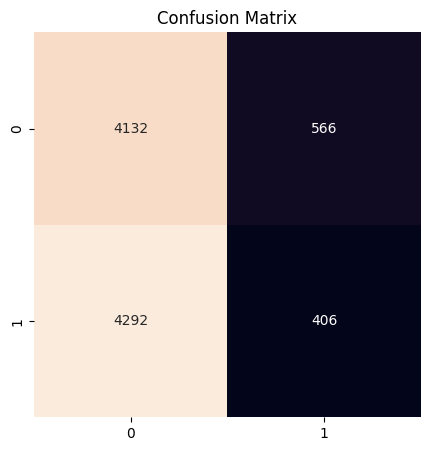

In [56]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(X_train)

# Predict anomalies (1 for normal, -1 for anomaly)
iso_pred_train = iso_forest.predict(X_train)
iso_pred_test = iso_forest.predict(X_test)

# Replace -1 with 1 (fraudulent) and 1 with 0 (non-fraudulent)
iso_pred_test = [1 if x == -1 else 0 for x in iso_pred_test]

# Calculate metrics
acc_iso = accuracy_score(y_test, iso_pred_test)
conf_matrix_iso = confusion_matrix(y_test, iso_pred_test)
classification_report_iso = classification_report(y_test, iso_pred_test)
roc_auc_iso = roc_auc_score(y_test, iso_pred_test)

print("Isolation Forest")
print("Accuracy:", acc_iso)
conf_matrix(y_test, iso_pred_test)
print("Classification Report:\n", classification_report_iso)
print("AUC ROC:", roc_auc_iso)


# Local Outlier Factor (LOF)

LOF is another anomaly detection method that measures the local deviation of a data point with respect to its neighbors.

Local Outlier Factor
Accuracy: 0.4780757769263516
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.88      0.63      4698
           1       0.39      0.08      0.13      4698

    accuracy                           0.48      9396
   macro avg       0.44      0.48      0.38      9396
weighted avg       0.44      0.48      0.38      9396

AUC ROC: 0.47807577692635167


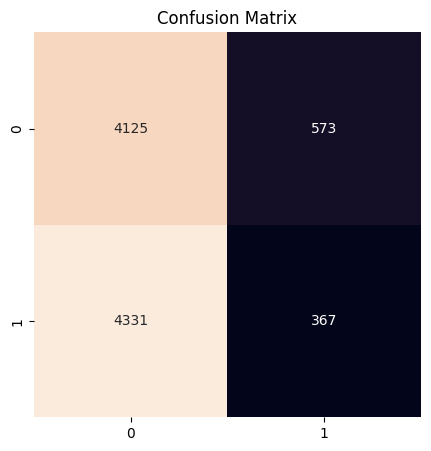

In [54]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Predict anomalies (1 for normal, -1 for anomaly)
lof_pred_train = lof.fit_predict(X_train)
lof_pred_test = lof.fit_predict(X_test)

# Replace -1 with 1 (fraudulent) and 1 with 0 (non-fraudulent)
lof_pred_test = [1 if x == -1 else 0 for x in lof_pred_test]

# Calculate metrics
acc_lof = accuracy_score(y_test, lof_pred_test)
conf_matrix_lof = confusion_matrix(y_test, lof_pred_test)
classification_report_lof = classification_report(y_test, lof_pred_test)
roc_auc_lof = roc_auc_score(y_test, lof_pred_test)

print("Local Outlier Factor")
print("Accuracy:", acc_lof)
conf_matrix(y_test, lof_pred_test)
print("Classification Report:\n", classification_report_lof)
print("AUC ROC:", roc_auc_lof)


# Combining Anomaly Detection Results with Random Forest

After detecting anomalies, we can filter out the anomalies detected during training and then retrain our Random Forest model.

Random Forest with Anomaly Detection
Accuracy: 0.955725840783312
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4698
           1       0.99      0.92      0.95      4698

    accuracy                           0.96      9396
   macro avg       0.96      0.96      0.96      9396
weighted avg       0.96      0.96      0.96      9396

AUC ROC: 0.955725840783312


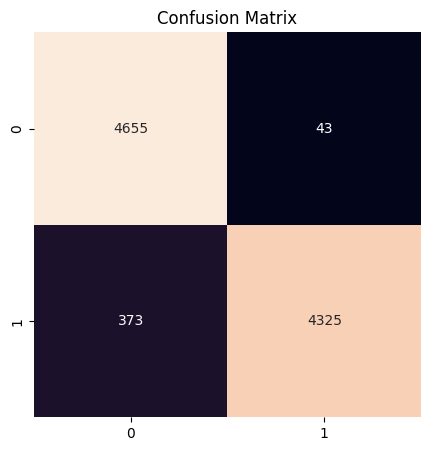

In [55]:
# Filter out anomalies from the training set
X_train_filtered = X_train[iso_pred_train == 1]
y_train_filtered = y_train[iso_pred_train == 1]

# Re-initialize and train the Random Forest classifier with the filtered data
rfc_filtered = RandomForestClassifier(**best_params, random_state=42)
rfc_filtered.fit(X_train_filtered, y_train_filtered)

# Predict on the test set
rfc_filtered_pred = rfc_filtered.predict(X_test)

# Calculate metrics
acc_rfc_filtered = accuracy_score(y_test, rfc_filtered_pred)
conf_matrix_rfc_filtered = confusion_matrix(y_test, rfc_filtered_pred)
classification_report_rfc_filtered = classification_report(y_test, rfc_filtered_pred)
roc_auc_rfc_filtered = roc_auc_score(y_test, rfc_filtered_pred)

print("Random Forest with Anomaly Detection")
print("Accuracy:", acc_rfc_filtered)
conf_matrix(y_test, rfc_filtered_pred)
print("Classification Report:\n", classification_report_rfc_filtered)
print("AUC ROC:", roc_auc_rfc_filtered)


# Summary of Anomaly Detection Results

In [52]:
from tabulate import tabulate

data = {
    'Model': ['Isolation Forest', 'Local Outlier Factor', 'Random Forest with Anomaly Detection'],
    'Accuracy Score': [acc_iso, acc_lof, acc_rfc_filtered],
    'AUC ROC': [roc_auc_iso, roc_auc_lof, roc_auc_rfc_filtered]
}

# Create a DataFrame from the data
comparison_table = pd.DataFrame(data)

# Print the comparison table using tabulate
print(tabulate(comparison_table, headers='keys', tablefmt='pretty'))


+---+--------------------------------------+--------------------+---------------------+
|   |                Model                 |   Accuracy Score   |       AUC ROC       |
+---+--------------------------------------+--------------------+---------------------+
| 0 |           Isolation Forest           | 0.4829714772243508 | 0.48297147722435074 |
| 1 |         Local Outlier Factor         | 0.4780757769263516 | 0.47807577692635167 |
| 2 | Random Forest with Anomaly Detection | 0.955725840783312  |  0.955725840783312  |
+---+--------------------------------------+--------------------+---------------------+
